## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  65.826797   898.629148  0.150630   6.366237  1.225067
1  95.719904   700.230794  0.871443   3.942613  1.500366
2  32.374660   732.556535  0.520699  10.581474  1.305484
3  79.664166  1164.233149  0.773680   1.458694  1.475057
4  51.276616  1303.214078  0.440466   5.810688  1.533902


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8346605	total: 57.9ms	remaining: 57.9s
1:	learn: 0.8288078	total: 58.6ms	remaining: 29.2s
2:	learn: 0.8204993	total: 59.1ms	remaining: 19.6s
3:	learn: 0.8150249	total: 59.7ms	remaining: 14.9s
4:	learn: 0.8079425	total: 60.2ms	remaining: 12s
5:	learn: 0.7999075	total: 60.7ms	remaining: 10.1s
6:	learn: 0.7922353	total: 61.1ms	remaining: 8.67s
7:	learn: 0.7860130	total: 61.6ms	remaining: 7.64s
8:	learn: 0.7810914	total: 62ms	remaining: 6.82s
9:	learn: 0.7748611	total: 62.4ms	remaining: 6.18s
10:	learn: 0.7670660	total: 63ms	remaining: 5.67s
11:	learn: 0.7608106	total: 63.4ms	remaining: 5.22s
12:	learn: 0.7549484	total: 64ms	remaining: 4.86s
13:	learn: 0.7512081	total: 64.4ms	remaining: 4.53s
14:	learn: 0.7457698	total: 65.2ms	remaining: 4.28s
15:	learn: 0.7399528	total: 65.5ms	remaining: 4.03s
16:	learn: 0.7331600	total: 66ms	remaining: 3.82s
17:	learn: 0.7268870	total: 66.5ms	remaining: 3.63s
18:	learn: 0.7202102	total: 67ms	remaining: 3.46s
19:	

113:	learn: 0.4012683	total: 106ms	remaining: 827ms
114:	learn: 0.3996326	total: 107ms	remaining: 823ms
115:	learn: 0.3976603	total: 107ms	remaining: 817ms
116:	learn: 0.3949664	total: 108ms	remaining: 811ms
117:	learn: 0.3928890	total: 108ms	remaining: 805ms
118:	learn: 0.3913224	total: 108ms	remaining: 800ms
119:	learn: 0.3896074	total: 108ms	remaining: 794ms
120:	learn: 0.3877065	total: 109ms	remaining: 788ms
121:	learn: 0.3863662	total: 109ms	remaining: 783ms
122:	learn: 0.3848017	total: 109ms	remaining: 778ms
123:	learn: 0.3831425	total: 109ms	remaining: 773ms
124:	learn: 0.3813515	total: 110ms	remaining: 770ms
125:	learn: 0.3795065	total: 110ms	remaining: 766ms
126:	learn: 0.3779113	total: 111ms	remaining: 761ms
127:	learn: 0.3763950	total: 111ms	remaining: 756ms
128:	learn: 0.3744367	total: 111ms	remaining: 752ms
129:	learn: 0.3725878	total: 112ms	remaining: 747ms
130:	learn: 0.3705736	total: 112ms	remaining: 744ms
131:	learn: 0.3689214	total: 113ms	remaining: 740ms
132:	learn: 

305:	learn: 0.1888766	total: 180ms	remaining: 408ms
306:	learn: 0.1883745	total: 181ms	remaining: 408ms
307:	learn: 0.1879959	total: 181ms	remaining: 407ms
308:	learn: 0.1874840	total: 182ms	remaining: 407ms
309:	learn: 0.1871099	total: 183ms	remaining: 408ms
310:	learn: 0.1862341	total: 184ms	remaining: 407ms
311:	learn: 0.1858932	total: 184ms	remaining: 407ms
312:	learn: 0.1853366	total: 185ms	remaining: 406ms
313:	learn: 0.1850015	total: 186ms	remaining: 405ms
314:	learn: 0.1845978	total: 186ms	remaining: 404ms
315:	learn: 0.1840294	total: 186ms	remaining: 403ms
316:	learn: 0.1833901	total: 187ms	remaining: 402ms
317:	learn: 0.1828661	total: 187ms	remaining: 401ms
318:	learn: 0.1824133	total: 187ms	remaining: 400ms
319:	learn: 0.1820718	total: 188ms	remaining: 399ms
320:	learn: 0.1817897	total: 188ms	remaining: 397ms
321:	learn: 0.1809137	total: 188ms	remaining: 396ms
322:	learn: 0.1798754	total: 189ms	remaining: 395ms
323:	learn: 0.1795446	total: 189ms	remaining: 394ms
324:	learn: 

578:	learn: 0.1074279	total: 280ms	remaining: 203ms
579:	learn: 0.1071618	total: 280ms	remaining: 203ms
580:	learn: 0.1068572	total: 281ms	remaining: 202ms
581:	learn: 0.1066441	total: 281ms	remaining: 202ms
582:	learn: 0.1063464	total: 281ms	remaining: 201ms
583:	learn: 0.1061387	total: 281ms	remaining: 200ms
584:	learn: 0.1058478	total: 282ms	remaining: 200ms
585:	learn: 0.1056454	total: 282ms	remaining: 199ms
586:	learn: 0.1054685	total: 283ms	remaining: 199ms
587:	learn: 0.1052119	total: 283ms	remaining: 198ms
588:	learn: 0.1050560	total: 284ms	remaining: 198ms
589:	learn: 0.1049551	total: 284ms	remaining: 198ms
590:	learn: 0.1047389	total: 285ms	remaining: 197ms
591:	learn: 0.1044777	total: 285ms	remaining: 196ms
592:	learn: 0.1042162	total: 285ms	remaining: 196ms
593:	learn: 0.1040384	total: 285ms	remaining: 195ms
594:	learn: 0.1039408	total: 286ms	remaining: 195ms
595:	learn: 0.1037284	total: 286ms	remaining: 194ms
596:	learn: 0.1034767	total: 287ms	remaining: 193ms
597:	learn: 

796:	learn: 0.0726917	total: 357ms	remaining: 90.9ms
797:	learn: 0.0725126	total: 357ms	remaining: 90.5ms
798:	learn: 0.0723731	total: 358ms	remaining: 90ms
799:	learn: 0.0723153	total: 358ms	remaining: 89.5ms
800:	learn: 0.0721244	total: 358ms	remaining: 89ms
801:	learn: 0.0720680	total: 359ms	remaining: 88.5ms
802:	learn: 0.0718924	total: 359ms	remaining: 88ms
803:	learn: 0.0716520	total: 359ms	remaining: 87.6ms
804:	learn: 0.0715969	total: 360ms	remaining: 87.1ms
805:	learn: 0.0715426	total: 360ms	remaining: 86.6ms
806:	learn: 0.0713585	total: 360ms	remaining: 86.2ms
807:	learn: 0.0711864	total: 361ms	remaining: 85.7ms
808:	learn: 0.0710119	total: 361ms	remaining: 85.2ms
809:	learn: 0.0708753	total: 361ms	remaining: 84.8ms
810:	learn: 0.0708223	total: 362ms	remaining: 84.3ms
811:	learn: 0.0705922	total: 362ms	remaining: 83.8ms
812:	learn: 0.0704237	total: 362ms	remaining: 83.3ms
813:	learn: 0.0703720	total: 363ms	remaining: 82.9ms
814:	learn: 0.0701483	total: 363ms	remaining: 82.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

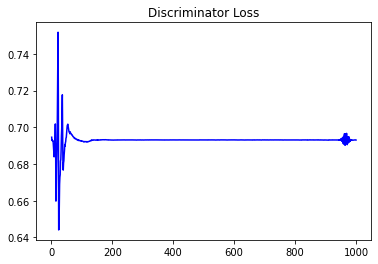

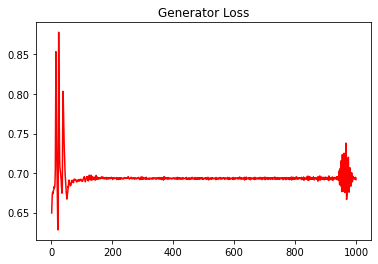

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.9007859975902329


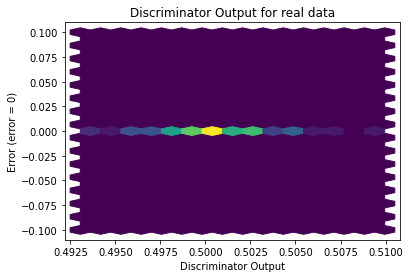

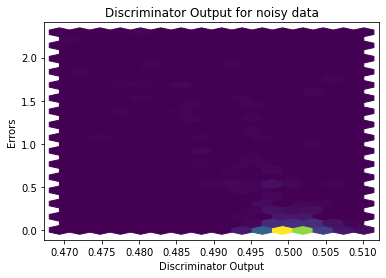

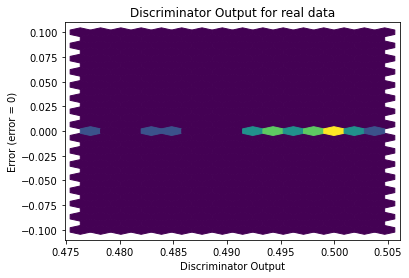

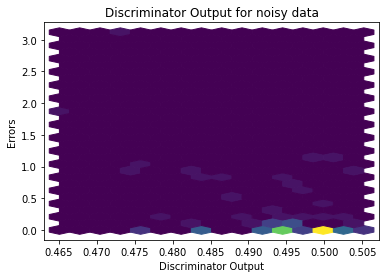

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


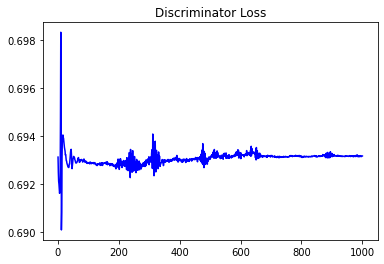

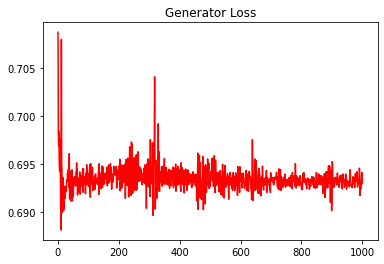

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.9588810391834675


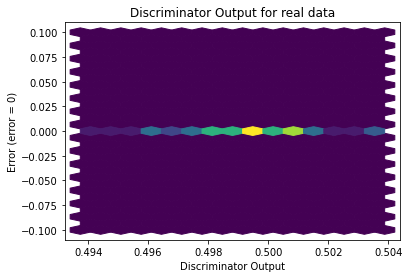

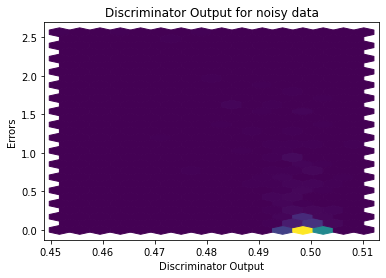

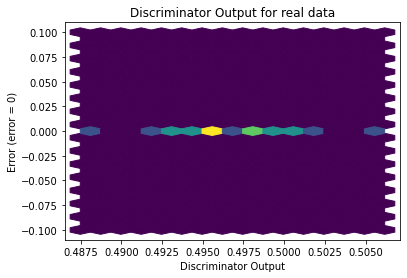

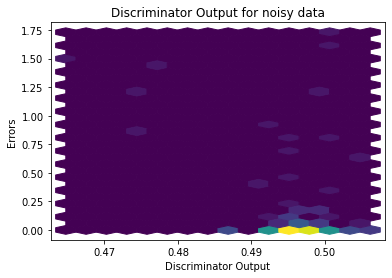

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0715]], requires_grad=True)
